# Credit Card Fraud Detecion
#### Nam Nguyen
<p>Credit card plays a essential role in digitalization of our society. Starting in the 1980s, there has been an impressive increase in the use of credit, debit and pre-paid cards internationally. According to Shift Processing (2020), there are 1.06 billion credit cards in use in America, and 2.8 billion credit cards in worldwide. However, this trend of using is a goldmine for cybercriminals. Credit card fraud is likely a growing concern for not only the merchants and card issuers but also the individual clients.  In 2018, the loss by payment card fraud reached 27.85 billion dollar worldwide, an increase of 16.2 % from 23.97 billion dollar in 2017, and is expected to increase to 35.67 billion dollar in next five years (Nilson Report, 2019). Many actions have been taken by credit card providers to response this alarming issue. In these measures , predictive model based on Machine Learning promises to be an effective solution. However, designing a fraud detection system based on Machine Learning is challenging task. One of the major concerns is the highly imbalanced class distribution of the input data due to the fact that only a very small percentage of all transactions is fraudulent.</p>
<p>In this notebook, we are going to deal with imbalanced classification problem in credit card fraud detection through working with a real data set.</p>
<p><img src='creditcard1.jpg' alt='Credit card'></p>
<p>We'll use <a href='https://www.kaggle.com/mlg-ulb/creditcardfraud'>Credit card fraud data set</a> in this notebook. This data set has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group of Universit Libre de Bruxelles (ULB) and Worldline on big data mining and fraud detection. It was also made available for public on Kaggle.</p>
<p>In detail, our data set presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</p>

### 1.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import time
# import matplotlib.patches as mpatches

# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA, TruncatedSVD
# from scipy.stats import norm

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler

import warnings
warnings.filterwarnings("ignore")

In [28]:
sns.set(style='whitegrid',palette='Set2')
# plt.style.use('ggplot')

In [29]:
df = pd.read_csv('input/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<p>Our data set has 30 input features in which 28 features have been generated by <strong>Principal Component Analysis (PCA)</strong>. Two features that have not been transfromed are <strong>Time</strong>, which refers the time between each transaction and the first transaction, and <strong>Amount</strong>, which tell us the amount of each transaction.</p>
<p>The target variable is Class which receive <strong>1</strong> if transaction is fraudulent and <strong>0</strong> if transaction is genuine</p>

In [30]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<p>There are no null values in our data set. So, we do not need the step to replace null values. Now we check the feature class to see how imbalaced our data set is.</p>

In [32]:
print('Genuine', round(df['Class'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Fraud',round(df['Class'].value_counts()[1]/len(df)*100,2),'% of the dataset')

Genuine 99.83 % of the dataset
Fraud 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Genuine || 1: Fraudulent)')

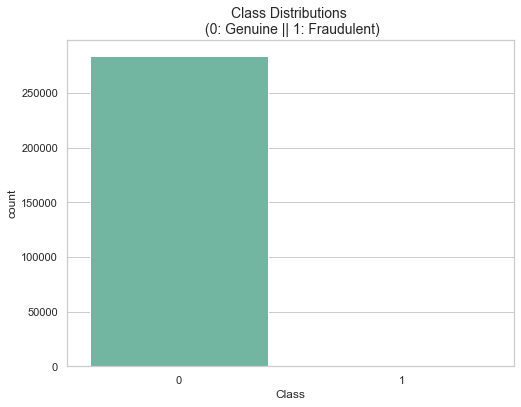

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: Genuine || 1: Fraudulent)', fontsize=14)

<p>Most of machine learning algorithm not work well in the severe imbanced data set like ours. If we use orgininal dataset for our prediction, we might get the errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud</p>

<p>Now we are going to take a look on the distribution of features <code>Amount</code> and <code>Time</code></p>

(0.0, 172792.0)

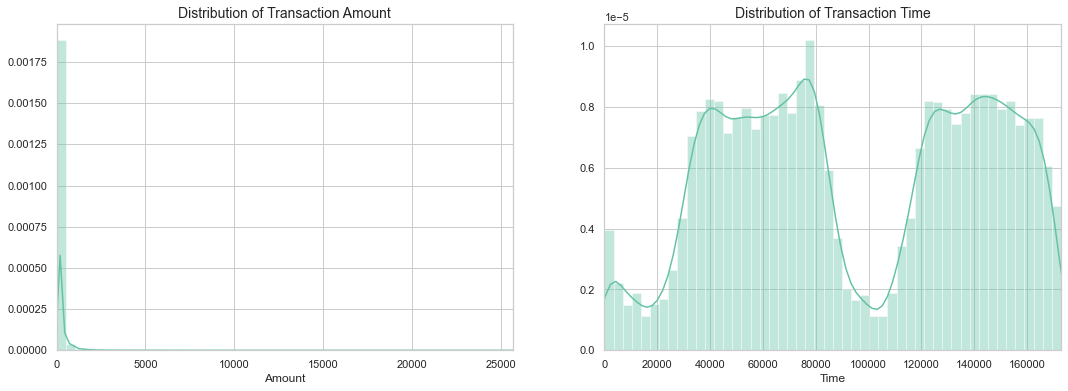

In [34]:
# Visualize the distribution of feature Amount a Time
fig, axes = plt.subplots(ncols=2, figsize=(18,6))
sns.distplot(df['Amount'], ax=axes[0])
axes[0].set_title('Distribution of Transaction Amount', fontsize=14)
axes[0].set_xlim([min(df['Amount']), max(df['Amount'])])

sns.distplot(df['Time'], ax=axes[1])
axes[1].set_title('Distribution of Transaction Time', fontsize=14)
axes[1].set_xlim([min(df['Time']), max(df['Time'])])

<p>Since most of our featues are scaled, we should scale our features <code>Time</code> and <code>Amount</code> as well.</p>

In [35]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


<p>Now we will show the correlation matrix to see the pairwise correlation between each variable </p>

Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

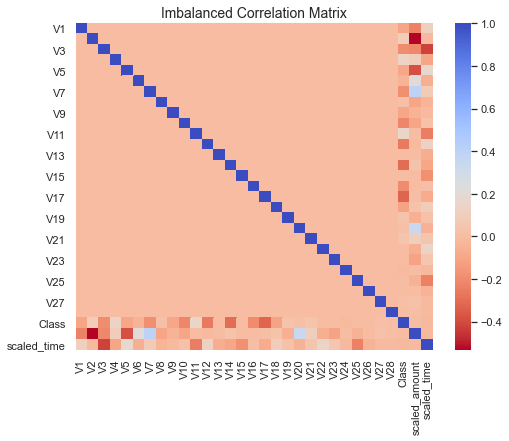

In [36]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm_r')
plt.title("Imbalanced Correlation Matrix", fontsize=14)

<p>We can see that target variable <code>Class</code> has some form of positive and negative correlations with the principal components, but it does not correlate with <code>Time</code> and <code>Amount<code>.</p>

In [37]:
X = df.drop('Class', axis=1)
y = df['Class']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

<!-- <p>We use Grid search to optimize hyper-parameters of models</p> -->

In [39]:
logreg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_logreg = GridSearchCV(LogisticRegression(), logreg_params)
grid_logreg.fit(X_train, y_train)
logreg = grid_logreg.best_estimator_
best_parameters = grid_logreg.best_params_
best_parameters

{'C': 10, 'penalty': 'l2'}

In [27]:
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(), svc_params)
# grid_svc.fit(X_train, y_train)
# svc = grid_svc.best_estimator_

In [28]:
# rfc_params = {'n_estimators': [200, 500],
#               'max_depth' : [4,5,6,7,8],
#               'criterion' :['gini', 'entropy']}
# grid_rfc = GridSearchCV(RandomForestClassifier(), rfc_params)
# grid_rfc.fit(X_train, y_train)
# rfc = grid_rfc.best_estimator_

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [19]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
xgb = XG

In [21]:
y_pred_logreg = logreg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

In [22]:
logreg_cnf_matrix = confusion_matrix(y_test, y_pred_logreg)
svc_cnf_matrix = confusion_matrix(y_test, y_pred_svc)
rfc_cnf_matrix = confusion_matrix(y_test, y_pred_rfc)

Text(0.5, 1.0, 'Random Forest Classifier \n Confusion Matrix')

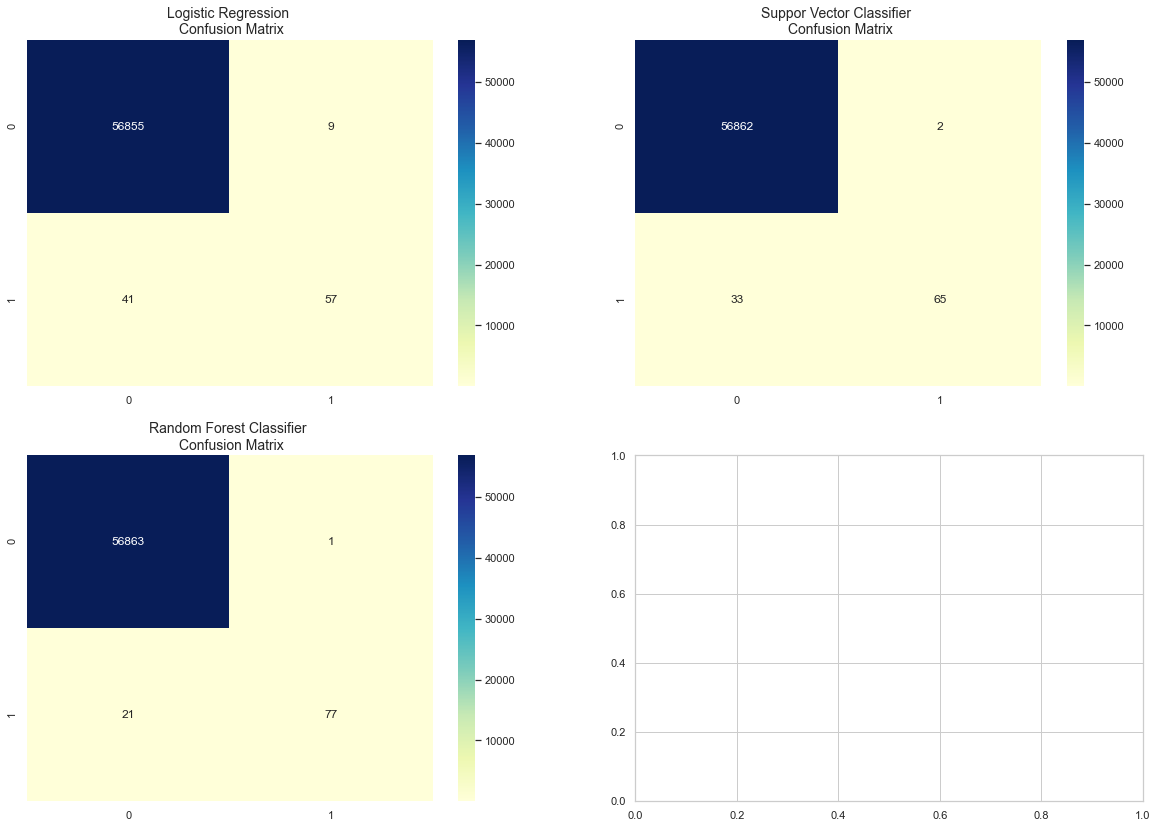

In [25]:
fig, axes = plt.subplots(2,2,figsize=(20,14))

sns.heatmap(logreg_cnf_matrix, ax = axes[0][0], annot=True, cmap="YlGnBu" ,fmt='g')
axes[0][0].set_title('Logistic Regression \n Confusion Matrix', fontsize=14)

sns.heatmap(svc_cnf_matrix, ax = axes[0][1], annot=True, cmap="YlGnBu" ,fmt='g')
axes[0][1].set_title('Suppor Vector Classifier \n Confusion Matrix', fontsize=14)

sns.heatmap(rfc_cnf_matrix, ax = axes[1][0], annot=True, cmap="YlGnBu" ,fmt='g')
axes[1][0].set_title('Random Forest Classifier \n Confusion Matrix', fontsize=14)

In [26]:
class_names = ['Genuine', 'Fraudulent']
print("Logistic Regression:\n{test}\n".format(test=classification_report(y_test, y_pred_logreg, target_names=class_names)))
print("Suppor Vector Classifier:\n{test}\n".format(test=classification_report(y_test, y_pred_svc, target_names=class_names)))
print("Random Forest Classifier:\n{test}\n".format(test=classification_report(y_test, y_pred_rfc, target_names=class_names)))

Logistic Regression:
              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     56864
  Fraudulent       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Suppor Vector Classifier:
              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     56864
  Fraudulent       0.97      0.66      0.79        98

    accuracy                           1.00     56962
   macro avg       0.98      0.83      0.89     56962
weighted avg       1.00      1.00      1.00     56962


Random Forest Classifier:
              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00     56864
  Fraudulent       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962